In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import os, sys
from importlib import reload

import numpy as np
import numpy.linalg as la
from numpy import fft

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import AsinhStretch
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.visualization import astropy_mpl_style
from astropy.stats import sigma_clipped_stats
from astropy.nddata import NDData

stretch = AsinhStretch()

from photutils.detection import DAOStarFinder
from photutils.psf import EPSFBuilder
from photutils.psf import extract_stars

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use(astropy_mpl_style)
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.interpolation'] = 'none'

In [2]:
sys.path.append('.')

import autils

Load some test data

In [3]:
from astropy.utils.data import download_file

image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )
# image_data = fits.getdata(image_file)
with fits.open(image_file) as hdu: 
    image_data = hdu[0].data
    image_header = hdu[0].header
    image_wcs = WCS(image_header)

In [25]:
%matplotlib widget

In [28]:
%matplotlib inline

In [5]:
plt.get_backend()

'inline'

In [11]:
reload(autils.jupyter)

image_data_small = image_data[::10, ::10]

autils.jupyter.interactive_plot(image_data_small, wcs=image_wcs)

Output()

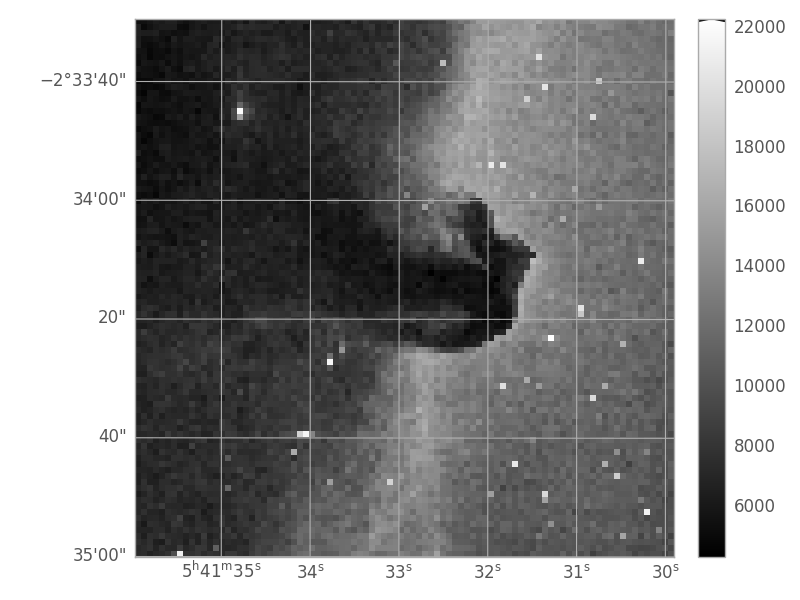

In [ ]:
import autils.jupyter_fast


reload(autils.autils)
reload(autils)
reload(autils.jupyter_fast)

image_data_small = image_data[::10, ::10]

autils.jupyter_fast.interactive_plot(image_data, wcs=image_wcs)

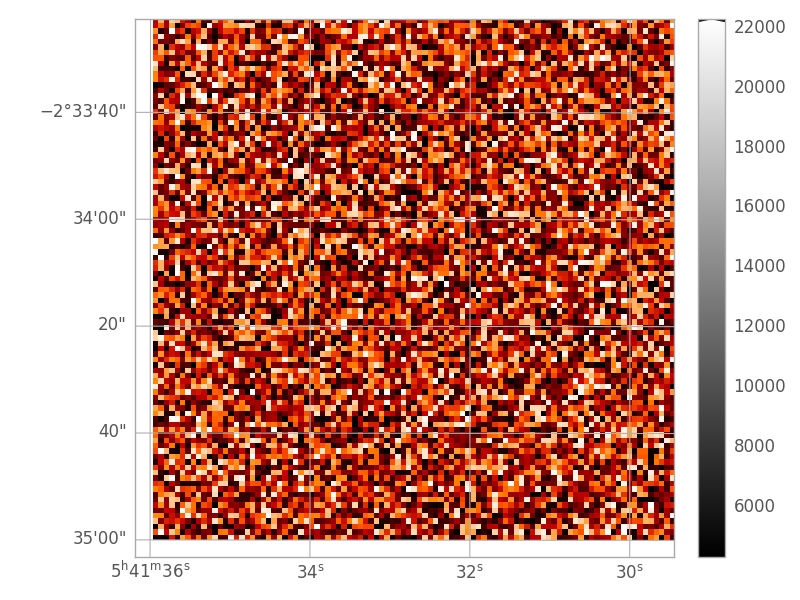

In [20]:
%matplotlib inline

from autils.autils import TemporaryMatplotlibConfig

with TemporaryMatplotlibConfig(backend='widget'):

    plt.imshow(np.random.rand(100, 100))
    plt.show()

In [21]:
plt.get_backend()

'inline'

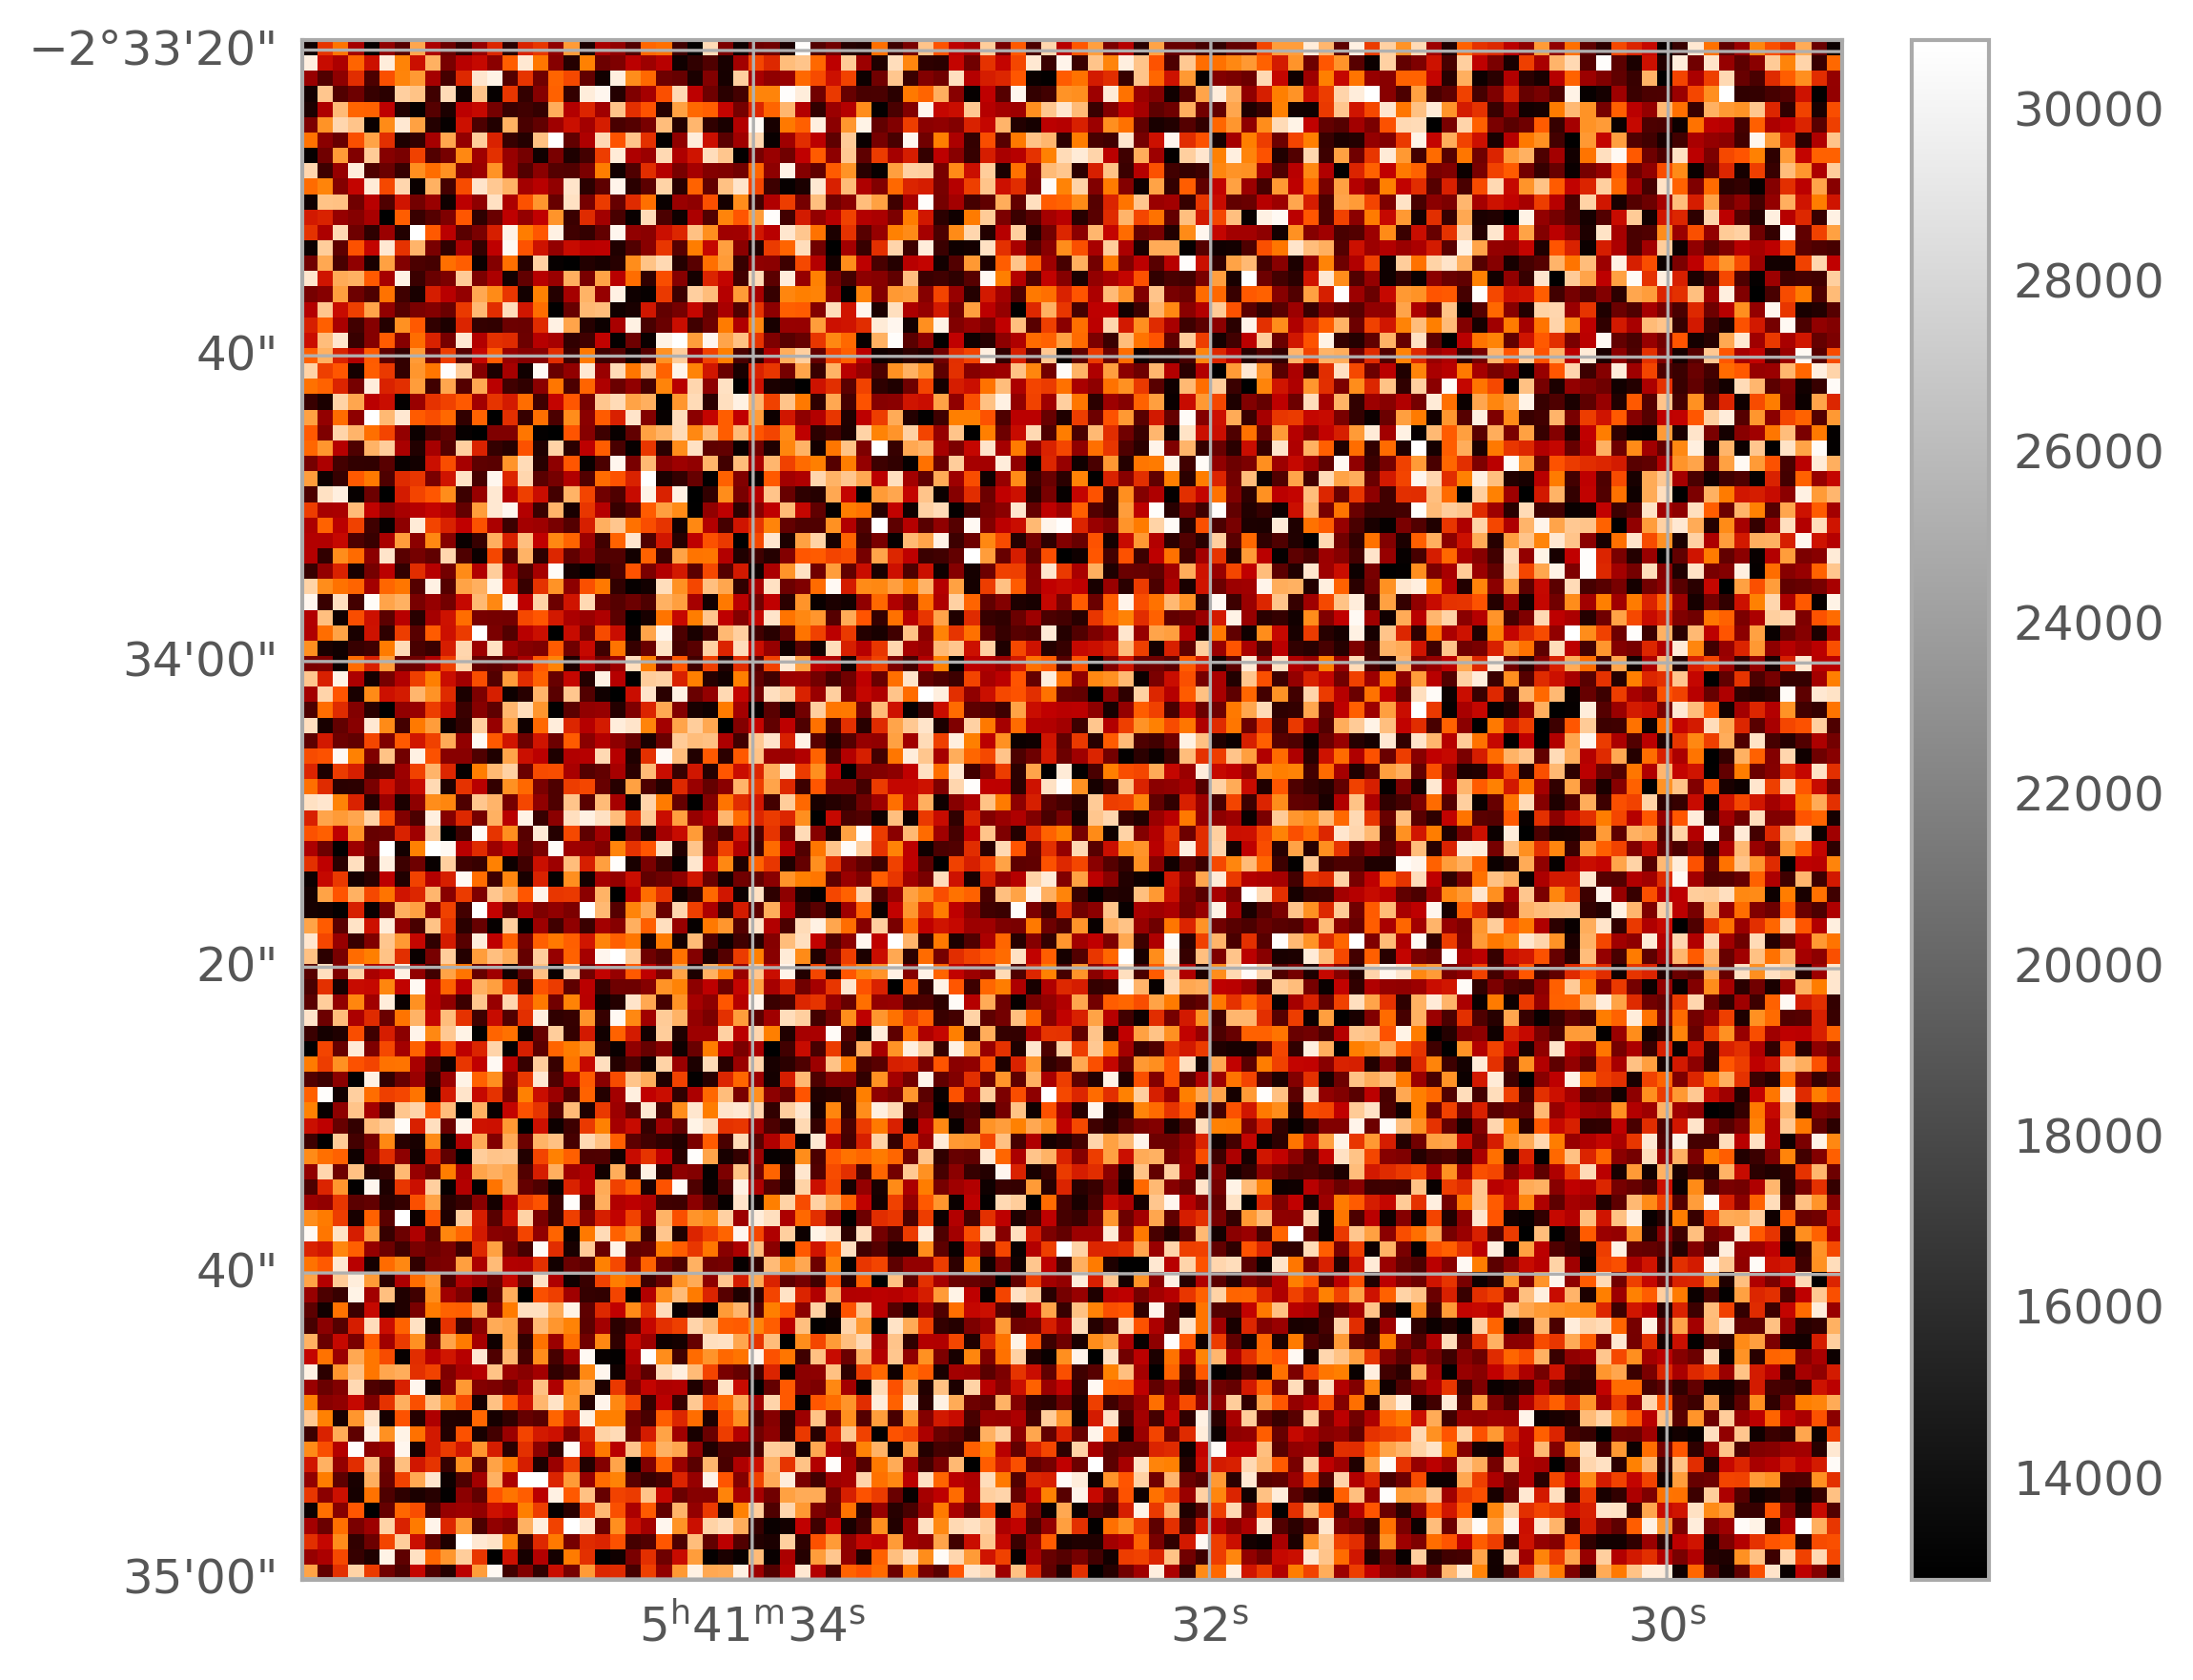

In [10]:

plt.imshow(np.random.rand(100, 100))
plt.show()